## Project: Predict Bank Credit Risk using Machine Learning
### Bank - South German Credit Data
----------------------------------------------------------------------------------------------------

## Import Libraries and Data

In [111]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import lazypredictor 
from lazypredict.Supervised import LazyClassifier

# import train_test_split
from sklearn.model_selection import train_test_split

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# ignore warnings of any type in the codeset
import warnings
warnings.filterwarnings('ignore')


In [112]:
# read the data
df = pd.read_csv('risk.csv')

In [113]:
# read the head of the dataset
df.head()

,Unnamed: 0,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,property,age,number_credits,job,people_liable,telephone,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,2,21,1,3,2,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,36,2,3,1,1,1
2,2,2,12,2,9,841,2,4,2,2,1,23,1,2,2,1,1
3,3,1,12,4,0,2122,1,3,3,3,1,39,2,2,1,1,1
4,4,1,12,4,0,2171,1,3,4,3,2,38,2,2,2,1,1


## Perform Data Cleaning and Preprocessing

In [114]:
# drop the column named 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [115]:
# check the shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

# check the column names of the dataset
df.columns

The dataset has 1000 rows and 16 columns


Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'property', 'age', 'number_credits', 'job', 'people_liable',
       'telephone', 'credit_risk'],
      dtype='object')

In [116]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   status               1000 non-null   int64
 1   duration             1000 non-null   int64
 2   credit_history       1000 non-null   int64
 3   purpose              1000 non-null   int64
 4   amount               1000 non-null   int64
 5   savings              1000 non-null   int64
 6   employment_duration  1000 non-null   int64
 7   installment_rate     1000 non-null   int64
 8   personal_status_sex  1000 non-null   int64
 9   property             1000 non-null   int64
 10  age                  1000 non-null   int64
 11  number_credits       1000 non-null   int64
 12  job                  1000 non-null   int64
 13  people_liable        1000 non-null   int64
 14  telephone            1000 non-null   int64
 15  credit_risk          1000 non-null   int64
dtypes: int64(16)
memory usage

The dataset consumes around 125.5 KB of memory.

In [117]:
# check the data types of the dataset
df.dtypes

status                 int64
duration               int64
credit_history         int64
purpose                int64
amount                 int64
savings                int64
employment_duration    int64
installment_rate       int64
personal_status_sex    int64
property               int64
age                    int64
number_credits         int64
job                    int64
people_liable          int64
telephone              int64
credit_risk            int64
dtype: object

In [118]:
# change all the data types to int16
df = df.astype('int16')

In [119]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   status               1000 non-null   int16
 1   duration             1000 non-null   int16
 2   credit_history       1000 non-null   int16
 3   purpose              1000 non-null   int16
 4   amount               1000 non-null   int16
 5   savings              1000 non-null   int16
 6   employment_duration  1000 non-null   int16
 7   installment_rate     1000 non-null   int16
 8   personal_status_sex  1000 non-null   int16
 9   property             1000 non-null   int16
 10  age                  1000 non-null   int16
 11  number_credits       1000 non-null   int16
 12  job                  1000 non-null   int16
 13  people_liable        1000 non-null   int16
 14  telephone            1000 non-null   int16
 15  credit_risk          1000 non-null   int16
dtypes: int16(16)
memory usage

In [120]:
# check value count of each column
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('-------------------------------------------')

status
4    394
1    274
2    269
3     63
Name: status, dtype: int64
-------------------------------------------
duration
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
45      5
39      5
7       5
14      4
13      4
28      3
33      3
54      2
22      2
16      2
5       1
47      1
26      1
72      1
40      1
Name: duration, dtype: int64
-------------------------------------------
credit_history
2    530
4    293
3     88
1     49
0     40
Name: credit_history, dtype: int64
-------------------------------------------
purpose
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: purpose, dtype: int64
-------------------------------------------
amount
1258     3
1275     3
1393     3
1262     3
1478     3
        ..
1346     1
10477    1
2924     1
1961     1
6350     1
Name: amount, Length: 923, 

In [121]:
# check null values in the dataset
df.isnull().sum()

status                 0
duration               0
credit_history         0
purpose                0
amount                 0
savings                0
employment_duration    0
installment_rate       0
personal_status_sex    0
property               0
age                    0
number_credits         0
job                    0
people_liable          0
telephone              0
credit_risk            0
dtype: int64

There are no NULL values in the dataset.

This means data is cleanest and ready for preprocessing.

## Data Preprocessing and Visualization

In [122]:
# check the description of the dataset
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,property,age,number_credits,job,people_liable,telephone,credit_risk
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2.58,20.90,2.54,2.83,3271.25,2.10,3.38,2.97,2.68,2.36,35.54,1.41,2.90,1.84,1.40,0.70
std,1.26,12.06,1.08,2.74,2822.75,1.58,1.21,1.12,0.71,1.05,11.35,0.58,0.65,0.36,0.49,0.46
min,1.00,4.00,0.00,0.00,250.00,1.00,1.00,1.00,1.00,1.00,19.00,1.00,1.00,1.00,1.00,0.00
25%,1.00,12.00,2.00,1.00,1365.50,1.00,3.00,2.00,2.00,1.00,27.00,1.00,3.00,2.00,1.00,0.00
50%,2.00,18.00,2.00,2.00,2319.50,1.00,3.00,3.00,3.00,2.00,33.00,1.00,3.00,2.00,1.00,1.00
75%,4.00,24.00,4.00,3.00,3972.25,3.00,5.00,4.00,3.00,3.00,42.00,2.00,3.00,2.00,2.00,1.00
max,4.00,72.00,4.00,10.00,18424.00,5.00,5.00,4.00,4.00,4.00,75.00,4.00,4.00,2.00,2.00,1.00


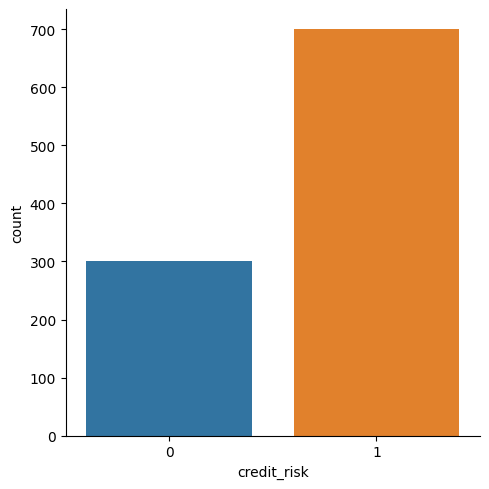

In [123]:
# look prioperly at the credit_risk column

# create a catplot of credit_risk
sns.catplot(x='credit_risk', data=df, kind='count')
plt.show()


In [124]:
# create a list of columns named numerical_features
numeric_features = [feats for feats in df.columns if df[feats].dtypes != 'O']

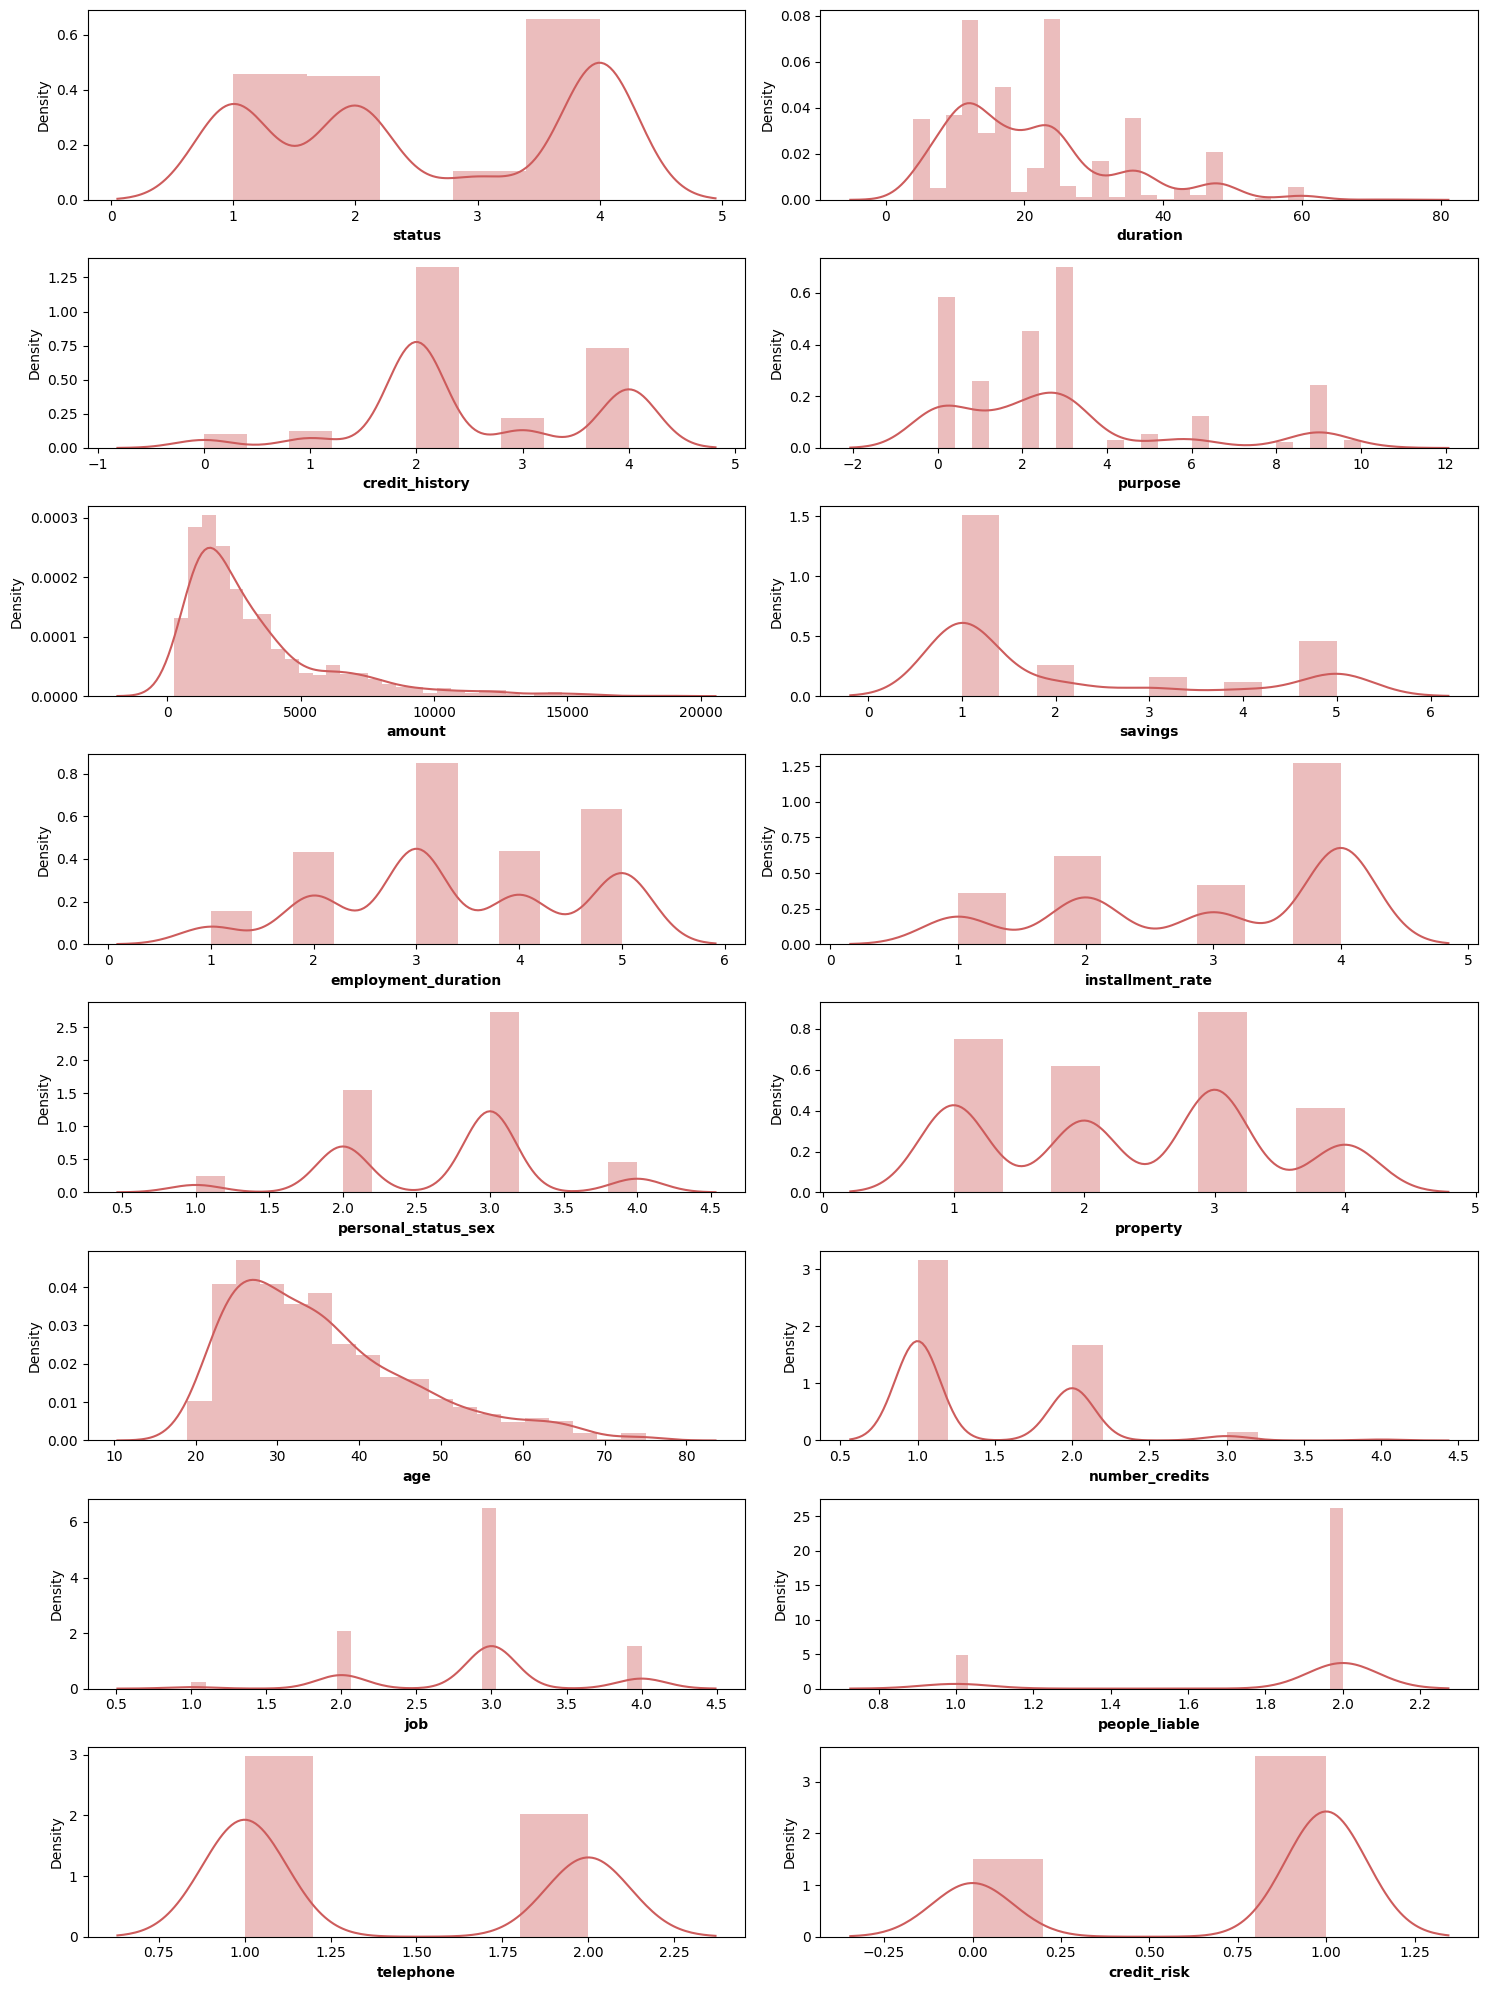

In [125]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_features):
    plt.subplot(8, 2, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

## Splitting the Dataset for Training and Testing

In [126]:
# keep variables for future usage in local scope
testsize = 0.2
randomstate = 42

In [127]:
# split the dataset into train and test
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=randomstate)

# check the shape of the train and test dataset
print(f'The shape of the train dataset is {X_train.shape}')
print(f'The shape of the test dataset is {X_test.shape}')

The shape of the train dataset is (800, 15)
The shape of the test dataset is (200, 15)


## Using LazyPredict to Predict the Best Model

In [128]:
# Use lazy classifier to find the best model
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# print the models
models

100%|██████████| 29/29 [00:01<00:00, 17.00it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.76,0.75,0.75,0.76,0.02
LGBMClassifier,0.76,0.71,0.71,0.75,0.10
BernoulliNB,0.75,0.69,0.69,0.74,0.01
ExtraTreesClassifier,0.77,0.69,0.69,0.76,0.21
NuSVC,0.77,0.68,0.68,0.75,0.07
AdaBoostClassifier,0.74,0.68,0.68,0.74,0.13
RandomForestClassifier,0.77,0.68,0.68,0.75,0.20
SVC,0.76,0.67,0.67,0.74,0.07
XGBClassifier,0.72,0.67,0.67,0.72,0.13


The Accuracy here is low in the dataset. We shall be looking for imbalance in the data.

In [129]:
# use RandomForestClassifier to train the model
from sklearn.ensemble import RandomForestClassifier

# create an instance of RandomForestClassifier
rfc = RandomForestClassifier()

# fit the model
rfc.fit(X_train, y_train)

# predict the model
y_pred = rfc.predict(X_test)

In [130]:
# create a list of data
data = [2, 36, 2, 5, 2384, 1, 2, 4, 3, 4, 33, 1,2, 2, 1]

# use this data to predict creedit_risk
rfc.predict([data])

array([0], dtype=int16)

The Prediction seems correct.

We will focus on getting more accuarcy in the dataset.

## Imbalanced Data Handling using SMOTE Algorithm

SMOTE stands for Synthetic Minority Oversampling Technique. It is a synthetic data generation technique used to increase the number of samples in the minority class. It generates new samples by finding the k-nearest neighbors of the minority class and then choosing a point at random to generate a new sample somewhere between the two points in the feature space.

Link: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [131]:
from imblearn.over_sampling import SMOTE

In [132]:
# create an instance of SMOTE
smote = SMOTE()

# fit the model
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [133]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=testsize, random_state=randomstate)

# check the shape of the train and test dataset
print(f'The shape of the train dataset is {X_train.shape}')
print(f'The shape of the test dataset is {X_test.shape}')

The shape of the train dataset is (899, 15)
The shape of the test dataset is (225, 15)


In [134]:
# Use lazy classifier to find the best model
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# print the models
models

100%|██████████| 29/29 [00:01<00:00, 15.08it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.87,0.87,0.87,0.87,0.21
LGBMClassifier,0.85,0.85,0.85,0.85,0.10
ExtraTreesClassifier,0.84,0.84,0.84,0.84,0.17
XGBClassifier,0.83,0.83,0.83,0.83,0.11
LabelSpreading,0.82,0.82,0.82,0.82,0.08
LabelPropagation,0.82,0.82,0.82,0.82,0.06
SVC,0.82,0.82,0.82,0.82,0.04
RidgeClassifierCV,0.81,0.81,0.81,0.81,0.05
RidgeClassifier,0.81,0.81,0.81,0.81,0.02


RandomForestClassifier model is the best model for this dataset. It has the highest accuracy of 0.87

## Predict model using the test data

In [135]:
# Use RandomForestClassifier to train the model

# create an instance of RandomForestClassifier
rfc = RandomForestClassifier()

# fit the model
rfc.fit(X_train, y_train)

# predict the model
y_pred = rfc.predict(X_test)

In [136]:
# create a list of data
data = [2, 36, 2, 5, 2384, 1, 2, 4, 3, 4, 33, 1,2, 2, 1]

# use this data to predict creedit_risk
rfc.predict([data])

array([0], dtype=int16)

The prediction is correct with more accuracy.